In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Detected normal label (treated as normal): 7
AE training on normal-only subset shape: (1411035, 24)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,064 (105.72 KB)

 Trainable params: 27,064 (105.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5512/5512 - 19s - 3ms/step - loss: 0.4336 - val_loss: 0.2603 - learning_rate: 1.0000e-04
Epoch 2/100
5512/5512 - 17s - 3ms/step - loss: 0.3436 - val_loss: 0.2288 - learning_rate: 1.0000e-04
Epoch 3/100
5512/5512 - 17s - 3ms/step - loss: 0.3187 - val_loss: 0.2179 - learning_rate: 1.0000e-04
Epoch 4/100
5512/5512 - 17s - 3ms/step - loss: 0.3058 - val_loss: 0.2127 - learning_rate: 1.0000e-04
Epoch 5/100
5512/5512 - 17s - 3ms/step - loss: 0.2966 - val_loss: 0.2087 - learning_rate: 1.0000e-04
Epoch 6/100
5512/5512 - 18s - 3ms/step - loss: 0.2895 - val_loss: 0.2065 - learning_rate: 1.0000e-04
Epoch 7/100
5512/5512 - 18s - 3ms/step - loss: 0.2838 - val_loss: 0.2046 - learning_rate: 1.0000e-04
Epoch 8/100
5512/5512 - 19s - 3ms/step - loss: 0.2794 - val_loss: 0.2030 - learning_rate: 1.0000e-04
Epoch 9/100
5512/5512 - 18s - 3ms/step - loss: 0.2756 - val_loss: 0.2014 - learning_rate: 1.0000e-04
Epoch 10/100
5512/5512 - 19s - 3ms/step - loss: 0.2725 - val_loss: 0.1995 - learning_rate: 

Saved DAE model to: /content/drive/MyDrive/zeusOps/models/unsw_dae_model.h5


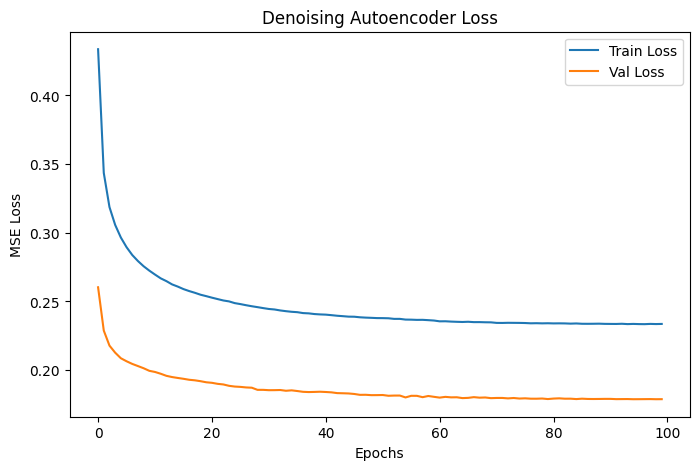

5149/5149 ━━━━━━━━━━━━━━━━━━━━ 4s 816us/step
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 12s 932us/step
5149/5149 ━━━━━━━━━━━━━━━━━━━━ 4s 804us/step

=== Threshold Comparison ===
          Method   Threshold        F1   ROC-AUC  Accuracy
0  Percentile-75    1.967816  0.296367  0.919931  0.788913
1  Percentile-80    2.561557  0.341890  0.919931  0.835859
2  Percentile-85    3.367591  0.398370  0.919931  0.880306
3  Percentile-90    5.232807  0.470222  0.919931  0.921172
4  Percentile-95  110.117409  0.447570  0.919931  0.945448
5        YoudenJ    2.355998  0.327279  0.919931  0.821410
6      BestF1_PR    7.082834  0.486203  0.919931  0.931286

>>> Best Choice: {'Method': 'BestF1_PR', 'Threshold': 7.082834243774414, 'F1': 0.48620289013143564, 'ROC-AUC': 0.9199313704422319, 'Accuracy': 0.9312863118895415}

=== Evaluation at Best Threshold ===
Confusion Matrix:
 [[370190  21764]
 [  6538  13391]]
              precision    recall  f1-score   support

      normal       0.98      0.94      0.96    39

In [2]:
# --- Imports ---
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# --- Paths ---
DATA_DIR = Path("/content/drive/MyDrive/zeusOps/data/UNSW-NB15")
MODEL_DIR = Path("/content/drive/MyDrive/zeusOps/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

# --- Load preprocessed (scaled) data ---
X_train = pd.read_pickle(DATA_DIR / "unsw_x_train.pkl").values.astype("float32")
X_test  = pd.read_pickle(DATA_DIR / "unsw_x_test.pkl").values.astype("float32")
y_train_raw = np.array(pd.read_pickle(DATA_DIR / "unsw_y_train.pkl")).ravel()
y_test_raw  = np.array(pd.read_pickle(DATA_DIR / "unsw_y_test.pkl")).ravel()

# --- Split validation set from training ---
X_train, X_val, y_train_raw, y_val_raw = train_test_split(
    X_train, y_train_raw, test_size=0.1, random_state=42, stratify=y_train_raw
)

# --- Detect normal label and binarize labels ---
unique, counts = np.unique(y_train_raw, return_counts=True)
normal_label = unique[np.argmax(counts)]
print("Detected normal label (treated as normal):", normal_label)

y_train = np.where(y_train_raw == normal_label, 0, 1)
y_val   = np.where(y_val_raw   == normal_label, 0, 1)
y_test  = np.where(y_test_raw  == normal_label, 0, 1)

# --- Prepare AE training data: only normal samples ---
X_train_normals = X_train[y_train == 0]
print("AE training on normal-only subset shape:", X_train_normals.shape)

# --- Noise injection helper ---
def add_noise(X, noise_factor=0.05):
    noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
    return np.clip(noisy, 0., 1.)

# --- Denoising Autoencoder Architecture ---
input_dim = X_train_normals.shape[1]
latent_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu', kernel_regularizer=l2(1e-5))(input_layer)
encoded = Dropout(0.3)(encoded)
encoded = Dense(64, activation='relu', kernel_regularizer=l2(1e-5))(encoded)
encoded = Dropout(0.3)(encoded)
bottleneck = Dense(latent_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dropout(0.3)(decoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

dae = Model(inputs=input_layer, outputs=output_layer)
dae.compile(optimizer=Adam(learning_rate=1e-4, clipvalue=1.0), loss='mse')
dae.summary()

# --- Callbacks ---
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# --- Train Denoising Autoencoder ---
X_train_noisy = add_noise(X_train_normals, noise_factor=0.05)
X_val_noisy   = add_noise(X_val, noise_factor=0.05)

history = dae.fit(
    X_train_noisy, X_train_normals,
    validation_data=(X_val_noisy, X_val),
    epochs=100,
    batch_size=256,
    shuffle=True,
    callbacks=callbacks,
    verbose=2
)

# --- Save model ---
dae.save(MODEL_DIR / "unsw_dae_model.h5")
print("Saved DAE model to:", MODEL_DIR / "unsw_dae_model.h5")

# --- Plot Training Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Denoising Autoencoder Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# --- Compute reconstruction MSE ---
recon_val = dae.predict(X_val)
mse_val = np.mean(np.square(X_val - recon_val), axis=1)

recon_test = dae.predict(X_test)
mse_test = np.mean(np.square(X_test - recon_test), axis=1)

# --- Threshold tuning for standalone performance evaluation ---
results = []
percentiles = [75, 80, 85, 90, 95]
for pct in percentiles:
    thr = np.percentile(mse_val, pct)
    y_pred = (mse_test >= thr).astype(int)
    results.append([
        f"Percentile-{pct}", thr,
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, mse_test),
        (y_pred == y_test).mean()
    ])

# --- Best threshold via Youden’s J statistic ---
from sklearn.metrics import roc_curve
fpr, tpr, thr_roc = roc_curve(y_val, np.mean(np.square(X_val - dae.predict(X_val)), axis=1))
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
youden_thr = thr_roc[best_idx]
y_pred = (mse_test >= youden_thr).astype(int)
results.append([
    "YoudenJ", youden_thr,
    f1_score(y_test, y_pred),
    roc_auc_score(y_test, mse_test),
    (y_pred == y_test).mean()
])

# --- Best F1 from Precision-Recall ---
prec, rec, thr_pr = precision_recall_curve(y_val, mse_val)
f1s = 2*prec*rec / (prec+rec+1e-6)
best_idx = np.argmax(f1s)
f1_thr = thr_pr[best_idx]
y_pred = (mse_test >= f1_thr).astype(int)
results.append([
    "BestF1_PR", f1_thr,
    f1_score(y_test, y_pred),
    roc_auc_score(y_test, mse_test),
    (y_pred == y_test).mean()
])

results_df = pd.DataFrame(results, columns=["Method", "Threshold", "F1", "ROC-AUC", "Accuracy"])
print("\n=== Threshold Comparison ===")
print(results_df)

best_row = results_df.loc[results_df["F1"].idxmax()]
print("\n>>> Best Choice:", best_row.to_dict())

final_thr = best_row["Threshold"]
y_pred_best = (mse_test >= final_thr).astype(int)

cm = confusion_matrix(y_test, y_pred_best)
print("\n=== Evaluation at Best Threshold ===")
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred_best, target_names=['normal','attack']))

# --- Save DAE test scores for ensemble ---
results_save = pd.DataFrame({
    "mse_test": mse_test,
    "y_test": y_test,
    "y_pred_best": y_pred_best
})
results_save.to_pickle(MODEL_DIR / "unsw_dae_test_results.pkl")
print("Saved test results to:", MODEL_DIR / "unsw_dae_test_results.pkl")
